# Flight Delays Project

### Presented by the Air Marshalls

In [9]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
import requests
import gmaps

# Import API key
from api_keys import g_key

# Specifying path
path = "C:/Users/Cris/Desktop/The_Air_Marshalls/flights.csv"
names_path = "C:/Users/Cris/Desktop/The_Air_Marshalls/airlines.csv"

#creating dataframe from excel file
flights = pd.read_csv(path, low_memory=False)
names = pd.read_csv(names_path)

df = pd.merge(flights, names, how="left", left_on=["AIRLINE"], right_on=["IATA_CODE"])

# display dataframe
df.rename(columns={"AIRLINE_x": "AIRLINE", "AIRLINE_y": "AIRLINE_NAME"}, inplace=True)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_NAME
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.


In [77]:
#Basic info on Delays per airline

#Dataframe grouped by Airline
adf = df.groupby('AIRLINE')

#creating the values for initial view
mean = adf['DEPARTURE_DELAY'].mean()
median = adf['DEPARTURE_DELAY'].median()
var = adf['DEPARTURE_DELAY'].var()
std = adf['DEPARTURE_DELAY'].std()
sem = adf['DEPARTURE_DELAY'].sem()

#creating dataframe
sinfo = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard Deviation': std,
    'Standard Error of Mean': sem
})

#setting all floats to 2 decimal points
pd.options.display.float_format = '{:,.2f}'.format

#display dataframe for general info on delays
sinfo

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
AIRLINE,,,,,
AA,8.90,-2.00,"1,755.39",41.90,0.05
AS,1.79,-4.00,695.14,26.37,0.06
B6,11.51,-2.00,"1,483.63",38.52,0.08
DL,7.37,-1.00,"1,320.41",36.34,0.04
EV,8.72,-3.00,"1,496.16",38.68,0.05
F9,13.35,-2.00,"2,451.33",49.51,0.16
HA,0.49,-4.00,602.73,24.55,0.09
MQ,10.13,-2.00,"1,649.60",40.62,0.08
NK,15.94,-1.00,"1,915.61",43.77,0.13


In [78]:
# creating a df where it contains only cancelled flights
cdf = df.loc[df['CANCELLED'] == 1]
#getting the count
cfl = cdf['CANCELLED'].count()
#printing initial results
print(f'In 2015, {cfl} flights were cancelled.')
#grouping by month
ndf = cdf.groupby('MONTH')
#get the count of cancelled flights and total flights
cancelled = ndf['CANCELLED'].count()
tot = cdf['CANCELLED'].count()
#create a dataframe to display information
cncl = pd.DataFrame({
    'Number of Cancellations': cancelled,
    '% Cancellations': (cancelled/tot)*100
})
# display df created
cncl

In 2015, 89884 flights were cancelled.


,Number of Cancellations,% Cancellations
MONTH,,
1,11982,13.33
2,20517,22.83
3,11002,12.24
4,4520,5.03
5,5694,6.33
6,9120,10.15
7,4806,5.35
8,5052,5.62
9,2075,2.31


In [79]:
#create a df where cancellations are A and B only
cre = (df.loc[(df["CANCELLATION_REASON"] == "A") | (df["CANCELLATION_REASON"] == "B")])
#group by the reasons
edf = cre.groupby(['CANCELLATION_REASON'])
#get the count of the cancelled flights and the total count of flights
cancelled = edf['CANCELLED'].count()
tote = cdf['CANCELLED'].count()
#create a dataframe to display information
cncle = pd.DataFrame({
    'Number of Cancellations': cancelled,
    '% Cancellations': (cancelled/tot)*100
})
#display df created
cncle

,Number of Cancellations,% Cancellations
CANCELLATION_REASON,,
A,25262,28.11
B,48851,54.35


(2073.0, 20519.0)

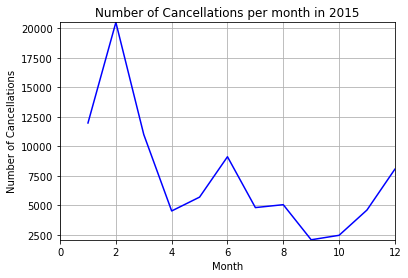

In [80]:
#plot the line chart
plt.plot(df['MONTH'].unique(), cncl["Number of Cancellations"], color="blue")
#add some details
plt.title(f"Number of Cancellations per month in 2015")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
#adding grid for reading precision
plt.grid()
#setting limits for x and y for optimal visual
plt.xlim(0,max(df['MONTH'].unique()))
plt.ylim(int(min(cncl["Number of Cancellations"]))-2,int(max(cncl["Number of Cancellations"]))+2)

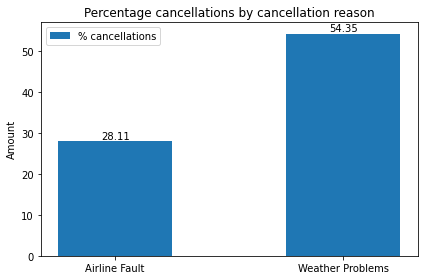

In [81]:
# creating x axis
x = np.arange(len(cre["CANCELLATION_REASON"].unique()))  # the label locations
width = 0.5 # will be used as column width
#plotting the bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x, cncle["% Cancellations"], width, label='% cancellations')
# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Amount')
ax.set_title('Percentage cancellations by cancellation reason')
ax.set_xticks(x)
ax.set_xticklabels(['Airline Fault', 'Weather Problems'])
#turning on legend after adding label
ax.legend()
# creating a function to add the numbers to the top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')
# running the functions
autolabel(rects1)
# fixing layout for optimal visualization
fig.tight_layout()

plt.show()

In [82]:
# What are the top 5 busiest origin airports in 2015? 

trim_df = df[['ORIGIN_AIRPORT','DEPARTURE_DELAY','ARRIVAL_DELAY','CANCELLED']]
busy_df = trim_df.groupby(['ORIGIN_AIRPORT']).size().reset_index(name='No of Flights')

busy_df = busy_df.sort_values(by="No of Flights", ascending=False)
top_busy_df = busy_df.head(5)
top_busy_df

,ORIGIN_AIRPORT,No of Flights
326,ATL,346836
534,ORD,285884
392,DFW,239551
391,DEN,196055
482,LAX,194673


Text(0.5, 1.0, 'Top 5 busiest origin airports in 2015')

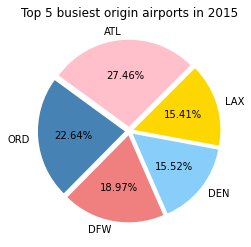

In [10]:
AIRPORT = ['ATL','ORD','DFW','DEN','LAX']
count = ['346836','285884','239551', '196055', '194673']
colors = ['pink', 'steelblue','lightcoral', 'lightskyblue', 'gold']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(count, labels=AIRPORT, colors=colors,
        startangle=45, explode=explode, autopct='%1.2f%%' )
plt.title('Top 5 busiest origin airports in 2015')

In [83]:
# What are the top 5 origin airports with the highest departure delays?

delays_df = trim_df.groupby(['ORIGIN_AIRPORT'], as_index=False).sum()
delays_df.head()

dep_delay_df = delays_df.sort_values(by="DEPARTURE_DELAY", ascending=False)
dep_delay_df.head()

,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,CANCELLED
534,ORD,"3,930,516.00","2,378,583.00",8548
326,ATL,"3,216,786.00","1,046,585.00",2557
392,DFW,"2,693,801.00","1,609,675.00",6254
391,DEN,"2,297,099.00","1,390,156.00",2123
482,LAX,"2,054,876.00","1,098,914.00",2164


In [84]:
# What are the top 5 origin airports with the highest arrival delays?

arr_delay_df = delays_df.sort_values(by="ARRIVAL_DELAY", ascending=False)
arr_delay_df.head()

,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,CANCELLED
534,ORD,"3,930,516.00","2,378,583.00",8548
392,DFW,"2,693,801.00","1,609,675.00",6254
391,DEN,"2,297,099.00","1,390,156.00",2123
482,LAX,"2,054,876.00","1,098,914.00",2164
457,IAH,"1,675,156.00","1,062,611.00",2130


In [85]:
# How many flights were cancelled every month for the top 5 origin airports?

c_df = df.groupby(['ORIGIN_AIRPORT','MONTH'], as_index=False).agg({'CANCELLED':'sum'})

cancelled_df = pd.merge(top_busy_df, c_df, how="left", on=["ORIGIN_AIRPORT", "ORIGIN_AIRPORT"])
clean_cancelled_df = cancelled_df.drop(columns = ['No of Flights'])

clean_cancelled_df.head(100)


,ORIGIN_AIRPORT,MONTH,CANCELLED
0,ATL,1,263
1,ATL,2,932
2,ATL,3,269
3,ATL,4,102
4,ATL,5,148
5,ATL,6,287
6,ATL,7,87
7,ATL,8,98
8,ATL,9,38
9,ATL,11,62


In [86]:
#Departure Delays in the US
total_flights = len(df)
dep_delays = df.loc[df["DEPARTURE_DELAY"]>0]

total_dep_delays = len(dep_delays)
per_dep_delay = total_dep_delays / total_flights * 100

av_delay = sum(dep_delays["DEPARTURE_DELAY"]) / total_dep_delays

print(f"In 2015, {per_dep_delay:.2f}% of flights were delayed in the US.")
print(f"The average delay time for these flights was {av_delay:.0f} minutes.")

In 2015, 36.53% of flights were delayed in the US.
The average delay time for these flights was 33 minutes.


In [103]:
#Departure Delays by airline
airline_delays = dep_delays["AIRLINE_NAME"].value_counts().sort_index(ascending=True)
airline_flights = df["AIRLINE_NAME"].value_counts().sort_index(ascending=True)
per_airline_delays = airline_delays / airline_flights * 100
tot_airline_delay = dep_delays.groupby("AIRLINE_NAME")["DEPARTURE_DELAY"].sum()
av_airline_delay = tot_airline_delay / airline_delays

delays_df = pd.DataFrame({"Total Flights": airline_flights,
                          "Total Departure Delays": airline_delays,
                          "% Departure Delays": per_airline_delays,
                          "Average Delay Time (mins)": av_airline_delay})
delays_df.index.name = "Airline"
delays_df.style.format({"% Departure Delays": "{:,.2f}%", "Average Delay Time (mins)": "{:,.0f}"})

,Total Flights,Total Departure Delays,% Departure Delays,Average Delay Time (mins)
Airline,,,,
Alaska Airlines Inc.,172521,43566,25.25%,26
American Airlines Inc.,725984,245904,33.87%,34
American Eagle Airlines Inc.,294632,93726,31.81%,40
Atlantic Southeast Airlines,571977,169897,29.70%,41
Delta Air Lines Inc.,875881,282463,32.25%,30
Frontier Airlines Inc.,90836,34893,38.41%,45
Hawaiian Airlines Inc.,76272,20146,26.41%,17
JetBlue Airways,267048,102061,38.22%,38
Skywest Airlines Inc.,588353,171572,29.16%,39


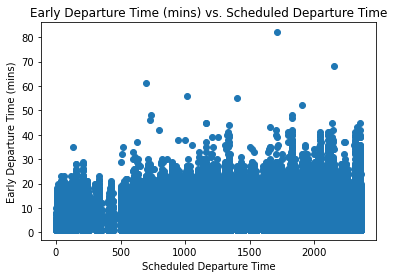

In [123]:
#Early Departures by Scheduled Departure Times
dep_early = df.loc[(df["DEPARTURE_DELAY"]<0), ["DEPARTURE_DELAY","SCHEDULED_DEPARTURE"]]
sch_dep = dep_early["SCHEDULED_DEPARTURE"]
dep_del = abs(dep_early["DEPARTURE_DELAY"])

plt.scatter(sch_dep, dep_del)
plt.title("Early Departure Time (mins) vs. Scheduled Departure Time")
plt.xlabel("Scheduled Departure Time")
plt.ylabel("Early Departure Time (mins)")

plt.show()

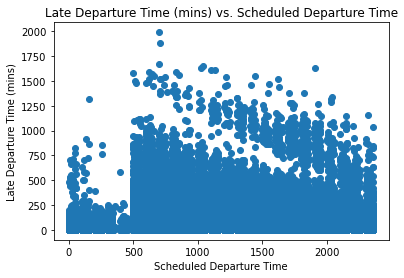

In [128]:
#Late Departures by Scheduled Departure Times
dep_late = df.loc[(df["DEPARTURE_DELAY"]>0), ["DEPARTURE_DELAY","SCHEDULED_DEPARTURE"]]
plt.scatter(dep_late["SCHEDULED_DEPARTURE"], dep_late["DEPARTURE_DELAY"])
plt.title("Late Departure Time (mins) vs. Scheduled Departure Time")
plt.xlabel("Scheduled Departure Time")
plt.ylabel("Late Departure Time (mins)")

plt.show()

The r-value is: 0.9490577226252708.


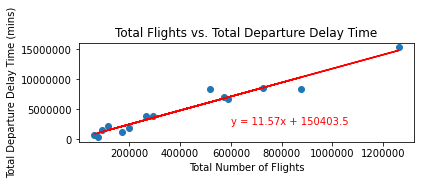

In [127]:
plt.subplot(2, 1, 1)
plt.scatter(airline_flights, tot_airline_delay)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title("Total Flights vs. Total Departure Delay Time")
plt.xlabel("Total Number of Flights")
plt.ylabel("Total Departure Delay Time (mins)")

slope, intercept, rvalue, pvalue, stderr = linregress(airline_flights, tot_airline_delay)
fit = slope * airline_flights + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(airline_flights, fit, "r-")

plt.annotate(line_eq,(600000,2500000), fontsize=10, color="red")
print(f"The r-value is: {rvalue**2}.")

plt.show()

In [107]:
stats.ttest_ind(airline_flights, tot_airline_delay)

Ttest_indResult(statistic=-3.984606562582109, pvalue=0.00048664751688847423)

In [11]:
# Specifying path
air_path = "C:/Users/Cris/Desktop/The_Air_Marshalls/airports.csv"

#creating dataframe from excel file
airports = pd.read_csv(air_path)

# display dataframe
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [12]:
gmaps.configure(api_key=g_key)

heat_layout = {
    'width': '900px',
    'height': '450px',
    'border': '2px solid black',
    'padding': '2px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=heat_layout,center=(40.0, -100.0), zoom_level=2)

locations = airports[['LATITUDE', 'LONGITUDE']]


fig.add_layer(gmaps.heatmap_layer(locations, 
                                  dissipating=False, 
                                  max_intensity=100, 
                                  point_radius=3))
fig

Figure(layout=FigureLayout(border='2px solid black', height='450px', margin='0 auto 0 auto', padding='2px', wi…

In [13]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Airport Name</dt><dd>{AIRPORT}</dd>
<dt>City</dt><dd>{CITY}</dd>
<dt>Country</dt><dd>{COUNTRY}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
airports_info = [info_box_template.format(**row) for index, row in airports.iterrows()]
locations = airports[['LATITUDE', 'LONGITUDE']]

# Add marker layer ontop of heat map
markers = gmaps.marker_layer(locations, info_box_content = airports_info)

# Display figure
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='2px solid black', height='450px', margin='0 auto 0 auto', padding='2px', wi…